In [1]:
from sklearn.datasets import load_diabetes

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
x,y = load_diabetes(return_X_y=True)

In [4]:
x.shape,y.shape

((442, 10), (442,))

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [7]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [8]:
print(reg.coef_)
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [9]:
y_pred = reg.predict(x_test)
r2_score(y_test,y_pred)

0.4399338661568969

In [10]:
x_train.shape

(353, 10)

In [36]:
class GDRegressor:
    def __init__(self,learning_rate=0.1,epochs=100):
        self.coef_=None
        self.intercept_= None
        self.lr= learning_rate
        self.epochs= epochs
        self.loss_history = []

    def fit(self,x_train, y_train):
        #init your coefs
        self.intercept_= 0
        self.coef_ = np.ones(x_train.shape[1])
        #print(self.intercept_, self.coef_)

        for i in range(self.epochs):
            # update all the coef and the intercept
            y_hat = np.dot(x_train,self.coef_) + self.intercept_
            #print("Shape of y_hat",y_hat.shape)
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            
            coef_der = -2 * np.dot((y_train - y_hat),x_train)/x_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)

             # Track loss (Mean Squared Error)
            loss = np.mean((y_train - y_hat) ** 2)
            self.loss_history.append(loss)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,x_test):
        return np.dot(x_test,self.coef_) + self.intercept_

    def plot_loss(self):
        # Plot loss history
        if not self.loss_history:
            print("No training history found.")
            return
        import matplotlib.pyplot as plt
        plt.plot(range(self.epochs), self.loss_history, label="Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss (MSE)")
        plt.title("Loss Over Epochs")
        plt.legend()
        plt.grid(True)
        plt.show()
    

In [15]:
gd= GDRegressor()

In [13]:
gd.fit(x_train, y_train)

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [37]:
gdr = GDRegressor(epochs=1000,learning_rate=0.5)

In [38]:
gdr.fit(x_train, y_train)

152.01351687661833 [  14.38990585 -173.7235727   491.54898524  323.91524824  -39.32648042
 -116.01061213 -194.04077415  103.38135565  451.63448787   97.57218278]


In [39]:
y_pred = gdr.predict(x_test)

In [40]:
r2_score(y_test,y_pred)

0.4534503034722803

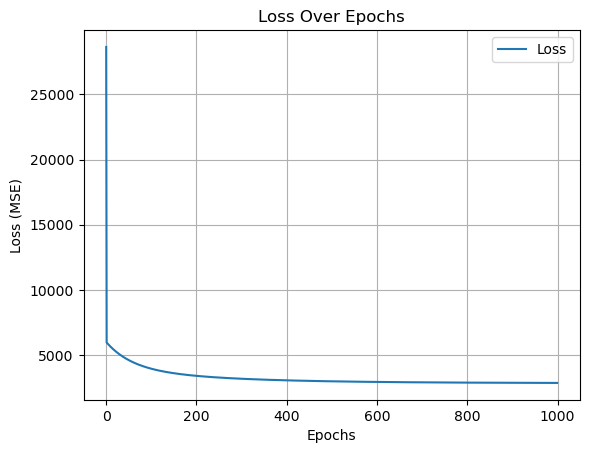

In [41]:
gdr.plot_loss()